In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

sns.set()


In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(url)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df['Churn'].value_counts()


,count
Churn,
No,5174
Yes,1869


In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [7]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


/tmp/ipython-input-419782261.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [8]:
df.drop('customerID', axis=1, inplace=True)


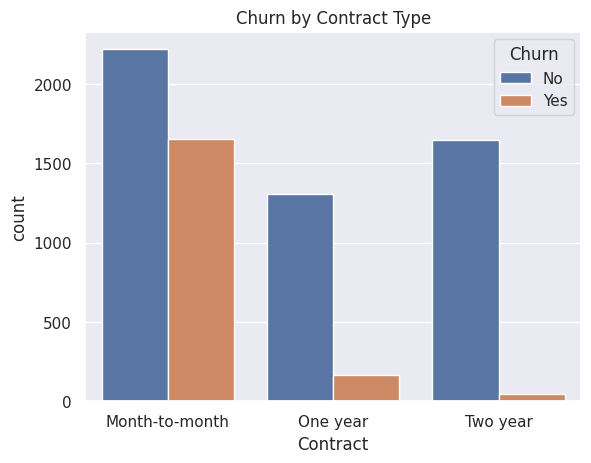

In [9]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()


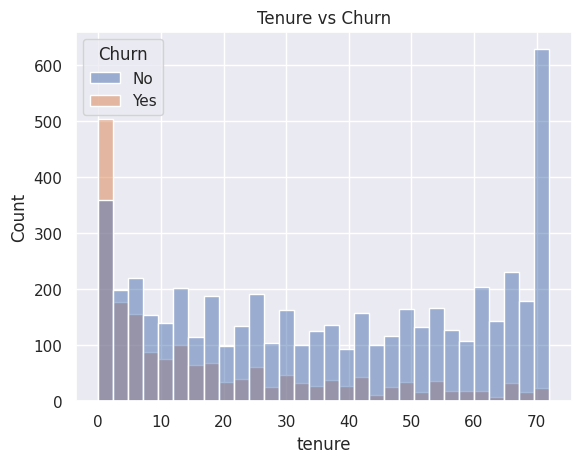

In [10]:
sns.histplot(data=df, x='tenure', hue='Churn', bins=30)
plt.title('Tenure vs Churn')
plt.show()


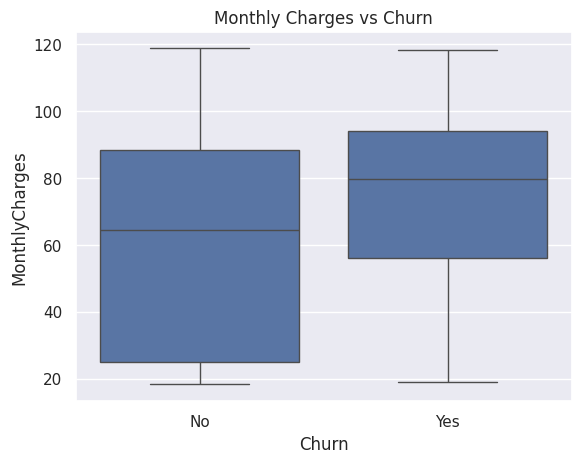

In [11]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()


In [12]:
def tenure_group(tenure):
    if tenure <= 12:
        return 'New'
    elif tenure <= 48:
        return 'Mid'
    else:
        return 'Loyal'

df['TenureGroup'] = df['tenure'].apply(tenure_group)


In [13]:
df['HighValueCustomer'] = np.where(df['MonthlyCharges'] > df['MonthlyCharges'].median(), 1, 0)


In [14]:
le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


In [15]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [16]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8126064735945485
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1282
           1       0.69      0.57      0.62       479

    accuracy                           0.81      1761
   macro avg       0.77      0.74      0.75      1761
weighted avg       0.81      0.81      0.81      1761



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7847813742191937
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1282
           1       0.65      0.46      0.54       479

    accuracy                           0.78      1761
   macro avg       0.73      0.68      0.70      1761
weighted avg       0.77      0.78      0.77      1761



In [18]:
df['Revenue'] = df['MonthlyCharges'] * df['tenure']


In [19]:
revenue_lost = df[df['Churn'] == 1]['Revenue'].sum()
revenue_lost


np.float64(2862576.9)

In [20]:
df['ChurnProbability'] = rf.predict_proba(X)[:,1]

high_risk_customers = df[
    (df['ChurnProbability'] > 0.7) & (df['HighValueCustomer'] == 1)
]

high_risk_customers.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,HighValueCustomer,Revenue,ChurnProbability
4,0,0,0,0,2,1,0,1,0,0,...,0,1,2,70.70,151.65,1,2,1,141.4,0.890
5,0,0,0,0,8,1,2,1,0,0,...,0,1,2,99.65,820.50,1,2,1,797.2,0.980
8,0,0,1,0,28,1,2,1,0,0,...,0,1,2,104.80,3046.05,1,1,1,2934.4,0.720
13,1,0,0,0,49,1,2,1,0,2,...,0,1,0,103.70,5036.30,1,0,1,5081.3,0.895
31,1,1,1,0,2,1,0,1,0,0,...,0,1,1,95.50,181.65,0,2,1,191.0,0.895


## Key Insights

*   **Month-to-month contracts have the highest churn:** Customers on short-term contracts are more likely to churn, indicating a lack of long-term commitment.
*   **New customers churn more:** Customers in their early stages (low tenure) show a higher propensity to churn, suggesting initial dissatisfaction or lack of engagement.
*   **High monthly charges increase churn risk:** Customers with higher monthly bills are at greater risk of churning, possibly due to perceived low value for money or competitive pricing elsewhere.
*   **Specific services contribute to churn:** Certain services (e.g., lack of online security, tech support) might be correlated with higher churn rates, indicating pain points in the customer experience.

## Recommendations

*   **Incentivize long-term contracts:** Offer discounts or exclusive benefits for customers who commit to one-year or two-year contracts to reduce month-to-month churn.
*   **Target high-risk customers with retention offers:** Identify customers with high churn probability and high value (as identified in the analysis) and provide personalized retention offers, such as discounted services or loyalty programs.
*   **Improve service quality for churn-heavy segments:** Address the issues identified with specific services that contribute to churn (e.g., enhance online security features, improve tech support responsiveness) to reduce dissatisfaction among vulnerable customer segments.